## MiMA resolved GW spectra

Can use Helmholtz decomposition to estimate resolved GW flux at T42 resolution directly from windflux. Will try with windspharm (easy to install than pyspharm)  
Express vector field in terms of divergent and rotational part. 
$$
u = \nabla \phi + \nabla \times \psi
$$
Note that:
$$
\nabla . u = 0 \implies \nabla^2 \phi = 0
$$
AND 
$$
\zeta = \nabla \times u \implies \zeta = - \nabla^2 \psi
$$ 

In [11]:
import xarray as xr 

ds = xr.open_dataset('data/atmos_daily.nc')

In [12]:
from windspharm.xarray import VectorWind

wind = VectorWind(ds.ucomp,ds.vcomp)

In [13]:
uchi,_,upsi,_ = wind.helmholtz()
uchiT21,_,upsiT21,_ = wind.helmholtz(truncation=21)

In [4]:
u_pert = uchi - uchiT21

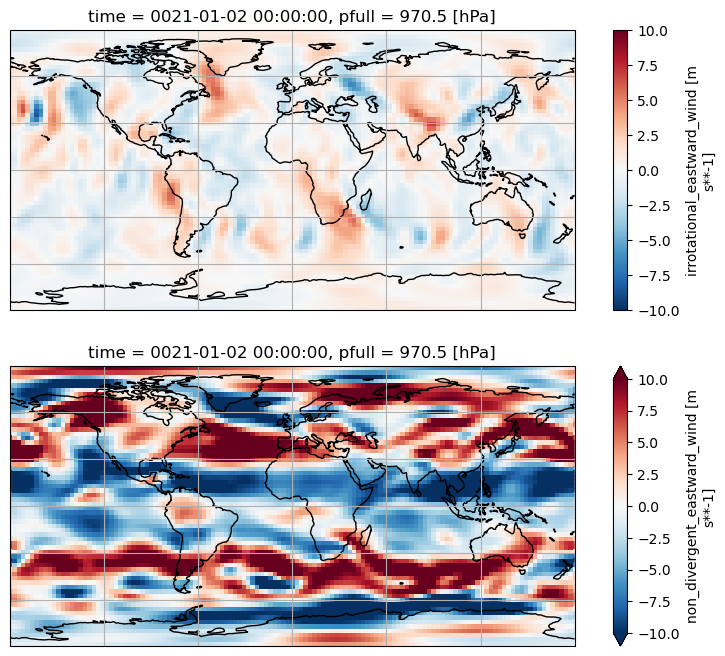

In [5]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
uchi_sfc = uchi.isel(pfull=-1,time=0)
upsi_sfc = upsi.isel(pfull=-1,time=0)

fig,(ax_nd,ax_rot) = plt.subplots(2,1,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))  
uchi_sfc.plot(ax=ax_nd,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-10,vmax=10) 
ax_nd.coastlines()
ax_nd.gridlines() 
upsi_sfc.plot(ax=ax_rot,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-10,vmax=10)
ax_rot.coastlines()
ax_rot.gridlines()


In [6]:
psi = wind.streamfunction()
vort = wind.vorticity()

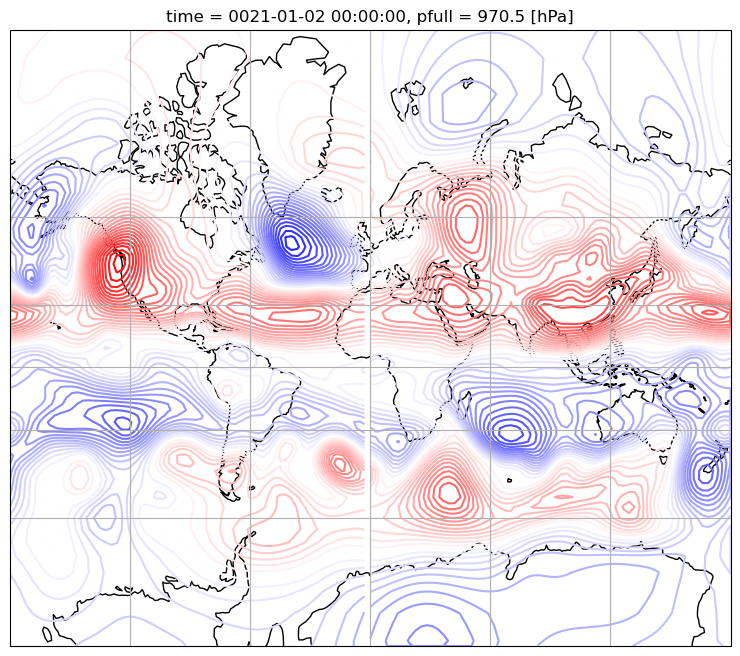

In [7]:
psi_sfc = psi.isel(pfull=-1,time=0)
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
psi_sfc.plot.contour(ax=ax,transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
ax.coastlines()
ax.gridlines()

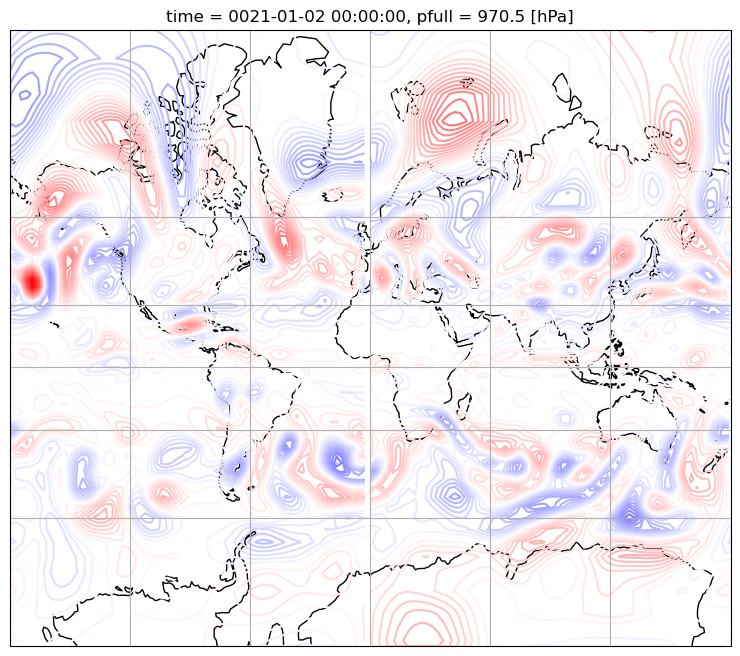

In [8]:
vort_sfc = vort.isel(pfull=-1,time=0)
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
vort_sfc.plot.contour(ax=ax,transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
ax.coastlines()
ax.gridlines()

In [9]:
from cartopy.util import add_cyclic_point

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x800', '-pix_fmt', 'rgba', '-framerate', '25', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'slp.mp4']' returned non-zero exit status 255.

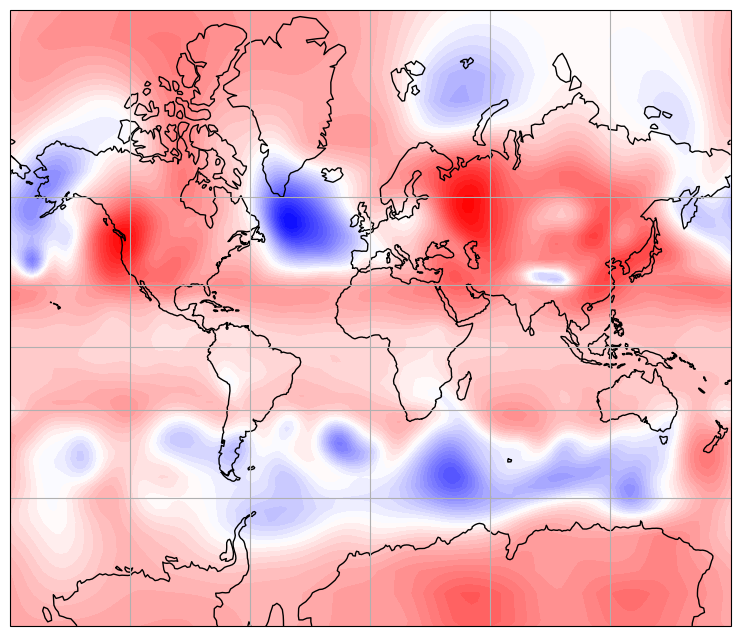

In [10]:
from constants import C_P, GAMMA,GRAV
import numpy as np
fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Mercator()},figsize=(10,8))
slp = ds.ps*(1 + (GRAV/C_P)*ds.height.isel(pfull=-1)/ds.temp.isel(pfull=-1))**(GAMMA/(GAMMA-1))


from matplotlib.animation import FuncAnimation

slp_cyclic, new_lon = add_cyclic_point(slp.isel(time=0), coord=ds.lon)
lon,lat = np.meshgrid(new_lon,ds.lat)
contour = ax.contourf(lon,lat, slp_cyclic/100, transform=ccrs.PlateCarree(),cmap='bwr',levels=50)

def step(i):
    ax.clear()

    slp_cyclic, new_lon = add_cyclic_point(slp.isel(time=i), coord=ds.lon)
    lon,lat = np.meshgrid(new_lon,ds.lat)
    ax.contourf(lon,lat, slp_cyclic/100, transform=ccrs.PlateCarree(),cmap='bwr',levels=50)
    ax.coastlines()
    ax.gridlines()
    return


ax.coastlines()
ax.gridlines()

anim = FuncAnimation(fig,step,frames=ds.time.size,interval=100)
anim.save('slp.mp4', fps=25)


In [11]:
u_pert

<xarray.DataArray 'u_chi' (time: 720, pfull: 40, lat: 64, lon: 128)> Size: 944MB
array([[[[ 1.19665027e-01,  9.43373442e-02,  6.79061413e-02, ...,
           1.87646151e-01,  1.66457653e-01,  1.43751264e-01],
         [ 4.05968428e-02,  1.26537085e-02, -1.38456821e-02, ...,
           1.28175020e-01,  9.88668203e-02,  6.95037842e-02],
         [-1.11286283e-01, -1.34249091e-01, -1.55296683e-01, ...,
          -4.52314615e-02, -6.56533241e-02, -8.79905224e-02],
         ...,
         [ 3.08098793e-02, -1.00991726e-01, -2.22269058e-01, ...,
           4.53890562e-01,  3.12477589e-01,  1.69890165e-01],
         [ 1.27314568e-01,  1.07351542e-01,  9.22758579e-02, ...,
           1.97856665e-01,  1.74632311e-01,  1.50405884e-01],
         [ 1.52658939e-01,  1.92643404e-01,  2.32401133e-01, ...,
           3.10537815e-02,  7.19006062e-02,  1.12422705e-01]],

        [[-2.63466549e+00, -2.34967232e+00, -2.05555797e+00, ...,
          -3.40534687e+00, -3.16539240e+00, -2.90755129e+00],
         [-7.73360729e-01, -2.84510851e-01,  1.96223736e-01, ...,
          -2.21698833e+00, -1.74667192e+00, -1.26313281e+00],
         [ 1.29318619e+00,  1.68625689e+00,  2.07095528e+00, ...,
           1.61544323e-01,  5.23218632e-01,  9.02575970e-01],
...
          -1.06989503e-01, -6.22676015e-02, -2.05978155e-02],
         [ 1.56949639e-01,  1.88186526e-01,  2.17508793e-01, ...,
           5.61175346e-02,  9.02661085e-02,  1.24124110e-01],
         [ 7.84813523e-01,  8.17992210e-01,  8.50474656e-01, ...,
           6.83094740e-01,  7.17174113e-01,  7.51142502e-01]],

        [[-4.56539512e-01, -4.42138135e-01, -4.26384687e-01, ...,
          -4.91993785e-01, -4.81426239e-01, -4.69622374e-01],
         [-4.50656056e-01, -4.71780777e-01, -4.91075754e-01, ...,
          -3.87853742e-01, -4.07772422e-01, -4.28972721e-01],
         [-1.57768726e-01, -2.36536026e-01, -3.27634335e-01, ...,
          -3.10826302e-03, -4.17954922e-02, -9.29014683e-02],
         ...,
         [ 1.11483777e+00,  8.78345132e-01,  5.90239048e-01, ...,
           1.39996350e+00,  1.38205791e+00,  1.28577971e+00],
         [ 9.46843386e-01,  8.68256927e-01,  7.72653699e-01, ...,
           1.04241943e+00,  1.03649735e+00,  1.00400352e+00],
         [ 1.01452768e+00,  1.02159667e+00,  1.02471018e+00, ...,
           9.66802001e-01,  9.87323165e-01,  1.00318289e+00]]]],
      shape=(720, 40, 64, 128), dtype=float32)
Coordinates:
  * lat      (lat) float32 256B 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lon      (lon) float32 512B 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * time     (time) object 6kB 0021-01-02 00:00:00 ... 0023-01-01 00:00:00
  * pfull    (pfull) float32 160B 0.1782 0.5562 0.7238 ... 821.4 902.2 970.5

In [12]:
dwdp_full = -wind.divergence()

In [ ]:
## interpolate to half levels
import numpy as np
from scipy.interpolate import make_interp_spline

bspl = make_interp_spline(np.log(ds.pfull), dwdp_full, axis=1,k=3)
dwdp_half = bspl(np.log(ds.phalf))

In [15]:
bspl(ds.phalf)

array([[[[ 4.73809221e-05,  5.38478480e-05,  5.99322510e-05, ...,
           2.59532508e-05,  3.34031623e-05,  4.05564719e-05],
         [ 5.03438494e-05,  5.42403804e-05,  5.71632442e-05, ...,
           3.20060402e-05,  3.93052590e-05,  4.53927614e-05],
         [ 4.79648793e-05,  3.57544262e-05,  2.45640218e-05, ...,
           8.58724494e-05,  7.35871053e-05,  6.07529850e-05],
         ...,
         [ 4.26906898e-05,  2.20574084e-05, -4.03784951e-07, ...,
           8.94072859e-05,  7.67062713e-05,  6.10380000e-05],
         [-2.74696516e-04, -2.82919041e-04, -2.89308918e-04, ...,
          -2.41738105e-04, -2.53850125e-04, -2.64918698e-04],
         [-1.37243726e-04, -1.34700198e-04, -1.31170001e-04, ...,
          -1.39279764e-04, -1.39494021e-04, -1.38829598e-04]],

        [[-7.61914910e-06, -9.18126143e-06, -1.06576136e-05, ...,
          -2.48986465e-06, -4.26537814e-06, -5.97797852e-06],
         [-1.38618028e-05, -1.49000925e-05, -1.56328405e-05, ...,
          -8.82041213e

In [40]:
from scipy.integrate import cumulative_trapezoid

w_full = cumulative_trapezoid(dwdp,ds.pfull,initial=0,axis=1)

In [38]:
w

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[-5.07624634e-07, -6.98331235e-07, -8.78604283e-07, ...,
           1.17965662e-07, -9.84437207e-08, -3.07337245e-07],
         [-1.94791846e-06, -2.08249890e-06, -2.17216916e-06, ...,
          -1.27161627e

In [39]:
dwdp.shape

(720, 40, 64, 128)